In [1]:
import pickle
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


dataset = pd.read_csv('heart_uci_dataset.csv', encoding='latin-1')
dataset = dataset.rename(columns=lambda x: x.strip().lower())


In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
le = LabelEncoder() # Convert catregorical data to numeric using self assigned numeric values for each class. Also for numeric data
for i in dataset.columns:
    dataset[i] = le.fit_transform(dataset[i]) # Fits and Transforms all data columns to their corresponding encoded numeric values
    
  

In [5]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,35,1,0,40,65,1,2,31,0,1,1,1,0,0
1,35,0,0,28,69,0,0,50,0,17,0,2,0,0
2,32,0,0,34,57,0,0,15,0,25,2,0,0,0
3,31,1,0,27,108,1,2,73,0,14,1,1,0,1
4,30,1,0,8,42,0,2,43,1,17,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,6,1,3,35,54,0,0,79,0,0,0,0,2,1
293,5,1,3,13,50,0,0,39,0,12,1,0,2,1
294,2,1,3,14,30,0,0,30,1,16,1,0,2,1
295,2,0,3,27,19,0,0,80,0,14,0,0,0,0


In [6]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.090712,0.109358,0.297727,0.194393,0.133778,0.151637,-0.392571,0.094869,0.207174,0.159703,0.362934,0.123386,0.229018
sex,-0.090712,1.000000,0.008908,-0.065423,-0.161810,0.038850,0.033897,-0.060987,0.143581,0.115921,0.033345,0.091925,0.370556,0.278467
cp,0.109358,0.008908,1.000000,-0.036993,0.070531,-0.057663,0.063905,-0.341690,0.377525,0.202707,0.151079,0.235644,0.266275,0.408945
trestbps,0.297727,-0.065423,-0.036993,1.000000,0.151344,0.171245,0.149408,-0.051057,0.054602,0.174451,0.106118,0.100676,0.116132,0.142751
chol,0.194393,-0.161810,0.070531,0.151344,1.000000,0.016705,0.156995,-0.020294,0.080217,0.025023,-0.015733,0.135562,0.009669,0.110577
fbs,0.133778,0.038850,-0.057663,0.171245,0.016705,1.000000,0.068831,-0.005324,-0.000893,0.015196,0.047819,0.152086,0.051038,0.003167
restecg,0.151637,0.033897,0.063905,0.149408,0.156995,0.068831,1.000000,-0.084377,0.081874,0.116516,0.135141,0.129021,0.013612,0.166343
thalach,-0.392571,-0.060987,-0.341690,-0.051057,-0.020294,-0.005324,-0.084377,1.000000,-0.398105,-0.372482,-0.396106,-0.274265,-0.268721,-0.426674
exang,0.094869,0.143581,0.377525,0.054602,0.080217,-0.000893,0.081874,-0.398105,1.000000,0.299664,0.250572,0.148232,0.323268,0.421355
oldpeak,0.207174,0.115921,0.202707,0.174451,0.025023,0.015196,0.116516,-0.372482,0.299664,1.000000,0.580542,0.287091,0.338136,0.429531


<AxesSubplot:>

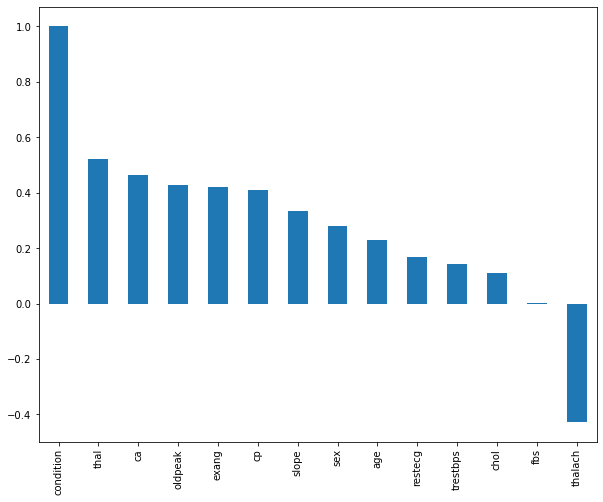

In [7]:
dataset.corrwith(dataset['condition']).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

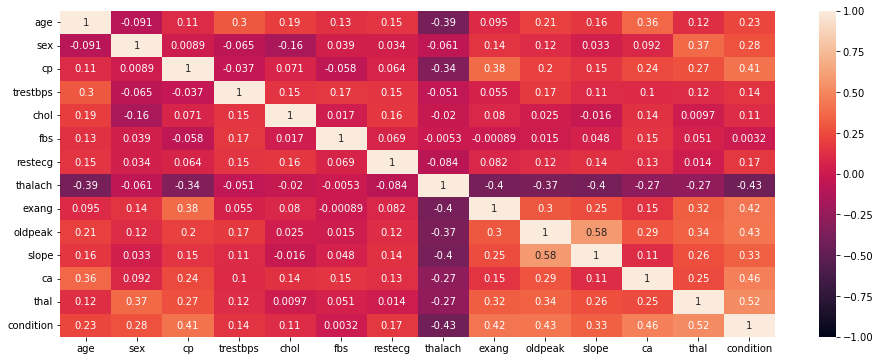

In [8]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [9]:
X = dataset.drop(['condition'], axis=1) #we want to predict condition from the given samples so excluding condition from features
y = dataset['condition'] #Making condition as our output y vector

In [10]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [11]:
#Splitting the data set for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)


generativeModel = GaussianNB()

generativeModel.fit(X_train, y_train)
yG_predict = generativeModel.predict(X_test)
yG_predict_p = generativeModel.predict_proba(X_test)

In [12]:
print(confusion_matrix(y_test,yG_predict))
print()
print(classification_report(y_test,yG_predict))

[[24  2]
 [ 8 26]]

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.93      0.76      0.84        34

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.85      0.83      0.83        60



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True)


generativeModel = GaussianNB()

generativeModel.fit(X_train, y_train)
yG_predict = generativeModel.predict(X_test)
yG_predict_p = generativeModel.predict_proba(X_test)

In [14]:
print(confusion_matrix(y_test,yG_predict))
print()
print(classification_report(y_test,yG_predict))

[[38  6]
 [ 4 27]]

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.82      0.87      0.84        31

    accuracy                           0.87        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.87      0.87      0.87        75



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,shuffle=True)


generativeModel = GaussianNB()

generativeModel.fit(X_train, y_train)
yG_predict = generativeModel.predict(X_test)
yG_predict_p = generativeModel.predict_proba(X_test)

In [16]:
print(confusion_matrix(y_test,yG_predict))
print()
print(classification_report(y_test,yG_predict))

[[20  1]
 [ 3  6]]

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.86      0.67      0.75         9

    accuracy                           0.87        30
   macro avg       0.86      0.81      0.83        30
weighted avg       0.87      0.87      0.86        30

